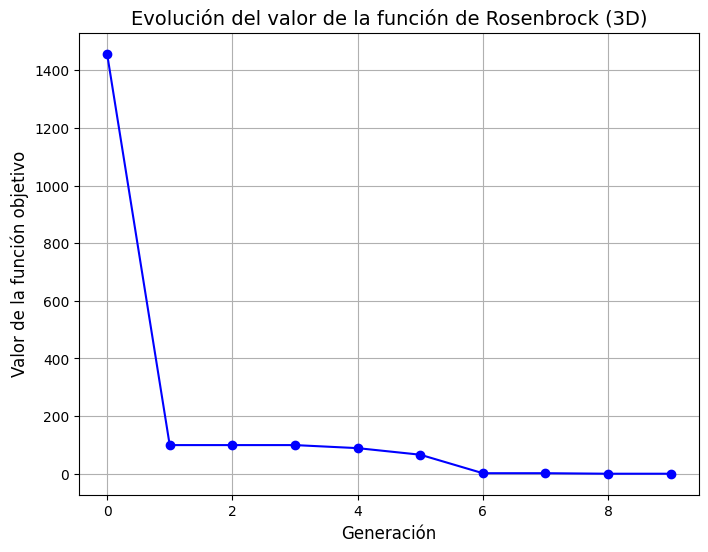

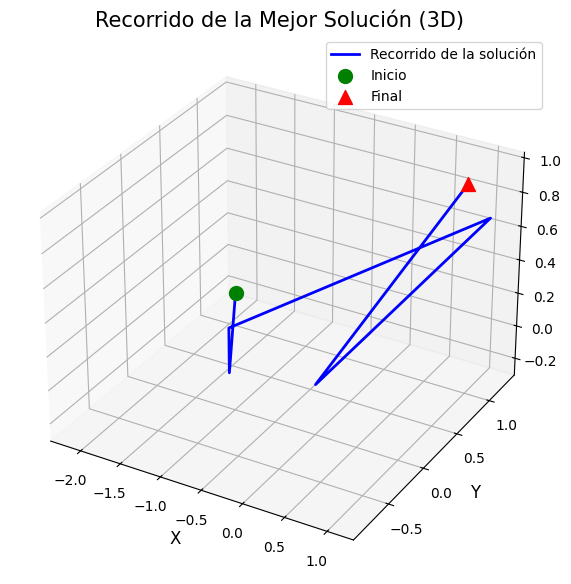

Mejor solución encontrada: [0.96973773 0.98237185 0.9462478 ]


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Funciones previamente definidas
def pob_inicial(N, d, LB, UB):
    Pob0 = np.random.rand(N, d)
    return Pob0 * (UB - LB) + LB

def mutacion(Pob, indices_mutantes, LB, UB):
    Pob = Pob.copy()
    for i in indices_mutantes:
        coord_mutacion = np.random.randint(low=0, high=Pob.shape[1], size=1)
        Pob[i, coord_mutacion[0]] = np.random.rand() * (UB[coord_mutacion[0]] - LB[coord_mutacion[0]]) + LB[coord_mutacion[0]]
    return Pob

def cruzamiento(Pob):
    Pob = Pob.copy()
    n_mitad = Pob.shape[0] // 2
    Pob_hijos = np.zeros_like(Pob)
    for i in range(n_mitad):
        coord_cruce = np.random.randint(low=0, high=Pob.shape[1])
        Pob_hijos[i, :] = np.concatenate((Pob[i, :coord_cruce], Pob[n_mitad + i, coord_cruce:]))
        Pob_hijos[n_mitad + i, :] = np.concatenate((Pob[n_mitad + i, :coord_cruce], Pob[i, coord_cruce:]))
    return Pob_hijos

def next_gen(Pob, LB, UB, fr_elitismo, fr_mutacion):
    n_row = Pob.shape[0]
    n_mutacion = int(n_row * fr_mutacion)
    n_cruzamiento = 2 * (n_row - int(n_row * fr_elitismo) - n_mutacion) // 2
    n_elite = n_row - n_cruzamiento - n_mutacion

    Pob_elite = Pob[:n_elite, :]
    indices_de_los_novios = np.random.choice(n_row, size=n_cruzamiento, replace=False)
    Pob_hijos = cruzamiento(Pob[indices_de_los_novios, :])
    indices_mutantes = np.random.choice(n_row, size=n_mutacion, replace=False)
    Pob_mutantes = mutacion(Pob, indices_mutantes, LB, UB)
    return np.vstack((Pob_elite, Pob_hijos, Pob_mutantes))

def fitness(Pob, f_obj):
    f_val = np.array([f_obj(individuo) for individuo in Pob])
    ranking = np.argsort(f_val)
    return Pob[ranking, :], f_val.min()

def mi_algoritmo_evolutivo(f_obj, N, d, fr_elitismo, fr_mutacion, num_generaciones, LB, UB):
    Pob0 = pob_inicial(N, d, LB, UB)
    x_best = []
    f_best = []
    for _ in range(num_generaciones):
        Pob_ranked, f_best_i = fitness(Pob0, f_obj)
        x_best.append(Pob_ranked[0, :])
        f_best.append(f_best_i)
        Pob0 = next_gen(Pob_ranked, LB, UB, fr_elitismo, fr_mutacion)
    return x_best, f_best

def rosenbrock_fun(x):
    return sum(100 * (x[i + 1] - x[i]**2)**2 + (1 - x[i])**2 for i in range(len(x) - 1))

# Configuración del algoritmo
np.random.seed(1234)
d = 3  # Número de dimensiones
num_generaciones = 10
LB = -5 * np.ones(d)
UB = 5 * np.ones(d)

mejor_sol, mejor_valor = mi_algoritmo_evolutivo(
    rosenbrock_fun, N=30, d=d, fr_elitismo=0.05, fr_mutacion=0.1, num_generaciones=num_generaciones, LB=LB, UB=UB
)

# Gráfica de la evolución de la función objetivo
plt.figure(figsize=(8, 6))
plt.plot(np.arange(0, num_generaciones), mejor_valor, marker='o', color='blue')
plt.title('Evolución del valor de la función de Rosenbrock (3D)', fontsize=14)
plt.xlabel('Generación', fontsize=12)
plt.ylabel('Valor de la función objetivo', fontsize=12)
plt.grid(True)
plt.show()

# Visualización del recorrido en 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Obtener los puntos de la mejor solución en cada generación
x_vals = [sol[0] for sol in mejor_sol]
y_vals = [sol[1] for sol in mejor_sol]
z_vals = [sol[2] for sol in mejor_sol]

# Graficar el recorrido de la mejor solución
ax.plot(x_vals, y_vals, z_vals, label='Recorrido de la solución', color='blue', lw=2)

# Graficar el punto inicial
ax.scatter(x_vals[0], y_vals[0], z_vals[0], color='green', s=100, label='Inicio', marker='o')

# Graficar el punto final
ax.scatter(x_vals[-1], y_vals[-1], z_vals[-1], color='red', s=100, label='Final', marker='^')

# Configuración de la gráfica
ax.set_title('Recorrido de la Mejor Solución (3D)', fontsize=15)
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_zlabel('Z', fontsize=12)
ax.legend()
plt.show()

print("Mejor solución encontrada:", mejor_sol[-1])



